In [14]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [15]:
def load_and_preprocess(filepath, is_test=False):
    data = pd.read_csv(filepath, delimiter=' ::: ', engine='python', header=None)
    if is_test:
        data.columns = ['ID', 'TITLE', 'DESCRIPTION']
    else:
        data.columns = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
    data['DESCRIPTION'] = data['DESCRIPTION'].str.lower().str.replace('[^\w\s]', '', regex=True)
    return data

In [16]:
train_data = load_and_preprocess('train_data.txt')
test_data = load_and_preprocess('test_data.txt', is_test=True)
test_solution_data = load_and_preprocess('test_data_solution.txt')

In [17]:
X_train = train_data['DESCRIPTION']
y_train = train_data['GENRE']
X_test = test_data['DESCRIPTION']
y_test = test_solution_data['GENRE']

In [18]:
X_train

0        listening in to a conversation between his doc...
1        a brother and sister with a past incestuous re...
2        as the bus empties the students for their fiel...
3        to help their unemployed father make ends meet...
4        the films title refers not only to the unrecov...
                               ...                        
54209    this shortlived nbc live sitcom centered on bo...
54210    the next generation of exploitation the sister...
54211    ze bestaan echt is a standup comedy about grow...
54212    walter and vivian live in the country and have...
54213    on labor day weekend 1935 the most intense hur...
Name: DESCRIPTION, Length: 54214, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test_tfidf)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5875276752767528

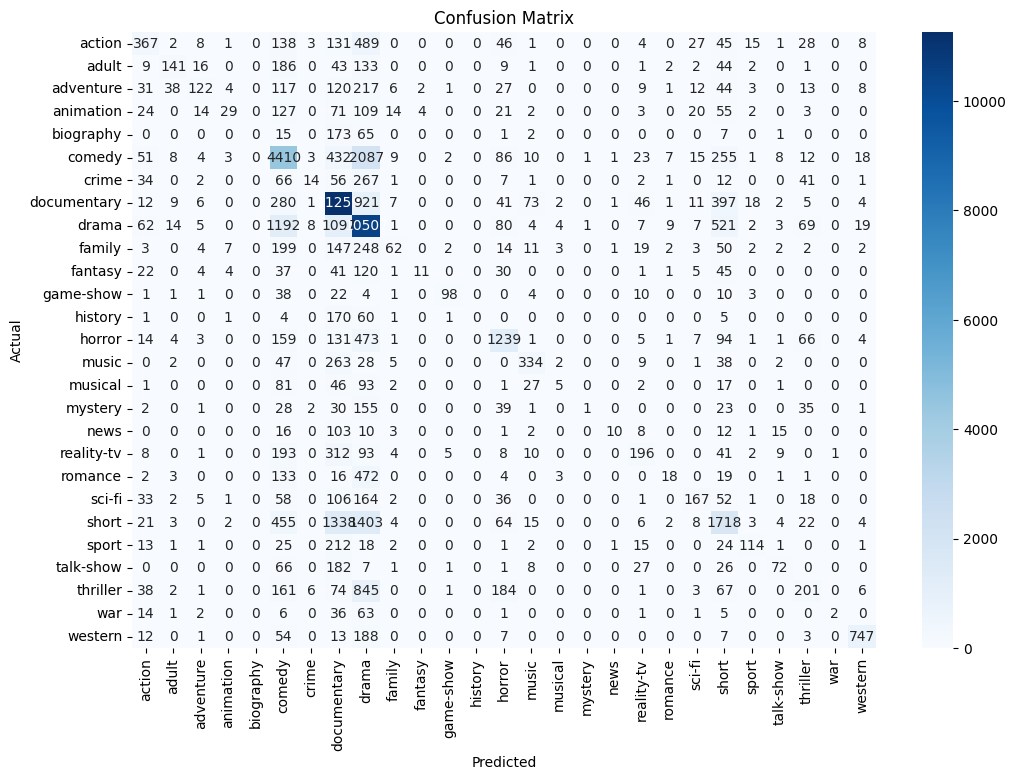

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()